In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, wilcoxon, f, mannwhitneyu, levene, shapiro, t
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
wcd = pd.read_csv('Wholesale Customers Data-1.csv')

In [3]:
wcd.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
wcd.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
wcd.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [6]:
wcd['total'] = wcd['Fresh']+wcd['Milk']+wcd['Grocery']+wcd['Frozen']+wcd['Detergents_Paper']+wcd['Delicatessen']

In [7]:
#1.1
wcd[wcd['total']==wcd['total'].max()]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
85,86,Retail,Other,16117,46197,92780,1026,40827,2944,199891


In [8]:
#1.1
wcd[wcd['total']==wcd['total'].min()]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
154,155,Hotel,Other,622,55,137,75,7,8,904


In [72]:
wcd.groupby('Region')['total'].sum() #region 0 is other region 2 is Oporto

Region
0    10677599
1     2386813
2     1555088
Name: total, dtype: int64

In [73]:
wcd.groupby('Channel')['total'].sum() #channel 0 is hotel channel 1 is retail

Channel
0    7999569
1    6619931
Name: total, dtype: int64

In [9]:
wcd['Fresh'].sum()

5280131

In [10]:
wcd['Milk'].sum()

2550357

In [11]:
wcd['Grocery'].sum()

3498562

In [12]:
wcd['Frozen'].sum()

1351650

In [13]:
wcd['Detergents_Paper'].sum()

1267857

In [14]:
wcd['Delicatessen'].sum()

670943

In [15]:
wcd_t = pd.DataFrame({'Fresh_total':[5280131], 'Milk_total':[2550357], 'Grocery_total':[3498562], 'Frozen_total':[1351650], 'Detergents_Paper_total':[1267857], 'Delicatessen_total':[670943]})

In [16]:
#1.2
wcd_t

,Fresh_total,Milk_total,Grocery_total,Frozen_total,Detergents_Paper_total,Delicatessen_total
0,5280131,2550357,3498562,1351650,1267857,670943


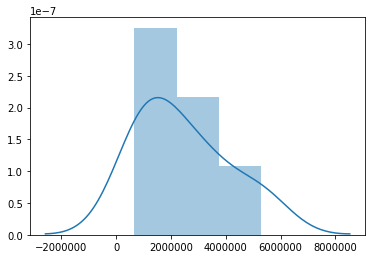

In [17]:
#1.2
sns.distplot(wcd_t)

In [18]:
#1.3
#min_std.Delicatessen=2820.105937
#max_std.Fresh=12647.328865

In [19]:
wcd.loc[wcd['Channel'] == 'Hotel','Channel']=0
wcd.loc[wcd['Channel'] == 'Retail','Channel']=1

In [20]:
wcd.loc[wcd['Region'] == 'Other','Region']=0
wcd.loc[wcd['Region'] == 'Lisbon','Region']=1
wcd.loc[wcd['Region'] == 'Oporto','Region']=2

IndexError: index 9 is out of bounds for axis 0 with size 9

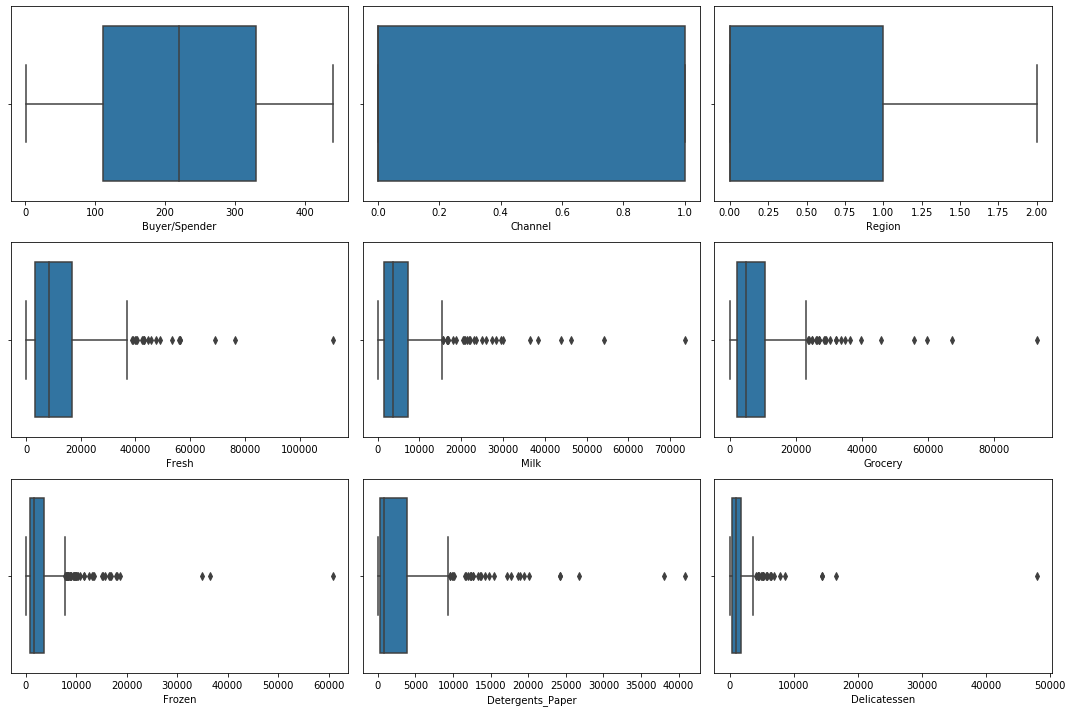

In [21]:
#1.4
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axes = axes.flatten()
for i,col in enumerate(wcd.columns):
    # print(col)
    fig = sns.boxplot(x=col,data=wcd,ax=axes[i])
    plt.tight_layout()

In [22]:
cmsu = pd.read_csv('Survey-1.csv')

In [23]:
#2.1.1
pd.crosstab(cmsu['Gender'], cmsu['Major'], margins =True) 

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [24]:
#2.1.2
pd.crosstab(cmsu['Gender'], cmsu['Grad Intention'], margins =True) 

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [25]:
#2.1.3
pd.crosstab(cmsu['Gender'], cmsu['Employment'], margins =True) 

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [26]:
#2.1.4
pd.crosstab(cmsu['Gender'], cmsu['Computer'], margins =True) 

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [27]:
sam_cmsu = cmsu.sample(frac =.35) 

In [28]:
#2.2
sam_cmsu
#taking 35% of sample data

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
13,14,Male,22,Senior,International Business,Undecided,3.1,Part-Time,40.0,1,3,400,Laptop,150
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300
49,50,Female,21,Senior,Economics/Finance,Undecided,3.0,Part-Time,45.0,1,3,520,Laptop,105
52,53,Female,21,Senior,Retailing/Marketing,Undecided,3.7,Part-Time,40.0,3,4,300,Laptop,700
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
22,23,Female,22,Senior,Retailing/Marketing,Undecided,3.0,Part-Time,55.0,0,4,300,Laptop,35
15,16,Male,24,Senior,Management,Undecided,3.4,Part-Time,45.0,4,4,500,Laptop,175
25,26,Male,24,Senior,Management,Yes,3.3,Full-Time,60.0,0,1,300,Laptop,40
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200


In [29]:
sam_cmsu['Gender'].value_counts()

Female    12
Male      10
Name: Gender, dtype: int64

In [30]:
#2.2.1
#probability that a randomly selected CMSU student will be male is 50%
#probability that a randomly selected CMSU student will be female is 50%

In [31]:
#2.2.2
df_M = sam_cmsu.groupby('Gender')['Major'].value_counts() / sam_cmsu.groupby('Gender')['Major'].count()
#sam_cmsu.groupby('Gender').Major.apply(lambda g: g.value_counts()/len(g))
df_M

Gender  Major                 
Female  Other                     0.250000
        Retailing/Marketing       0.250000
        Accounting                0.166667
        Economics/Finance         0.166667
        International Business    0.083333
        Management                0.083333
Male    Management                0.300000
        Economics/Finance         0.200000
        Other                     0.200000
        Accounting                0.100000
        International Business    0.100000
        Undecided                 0.100000
Name: Major, dtype: float64

In [32]:
#2.2.3
df_G = sam_cmsu.groupby('Gender')['Grad Intention'].value_counts() / sam_cmsu.groupby('Gender')['Grad Intention'].count()
df_G

Gender  Grad Intention
Female  Yes               0.500000
        Undecided         0.416667
        No                0.083333
Male    Yes               0.600000
        Undecided         0.300000
        No                0.100000
Name: Grad Intention, dtype: float64

In [33]:
#2.2.4
df_E = sam_cmsu.groupby('Gender')['Employment'].value_counts() / sam_cmsu.groupby('Gender')['Employment'].count()
df_E

Gender  Employment
Female  Part-Time     0.666667
        Full-Time     0.166667
        Unemployed    0.166667
Male    Part-Time     0.700000
        Full-Time     0.300000
Name: Employment, dtype: float64

In [34]:
#2.2.5
df_L = sam_cmsu.groupby('Gender')['Computer'].value_counts() / sam_cmsu.groupby('Gender')['Computer'].count()
df_L

Gender  Computer
Female  Laptop      0.833333
        Desktop     0.083333
        Tablet      0.083333
Male    Laptop      0.800000
        Desktop     0.200000
Name: Computer, dtype: float64

In [35]:
#2.3
dependent on each column

SyntaxError: invalid syntax (<ipython-input-35-6932de5dc292>, line 2)

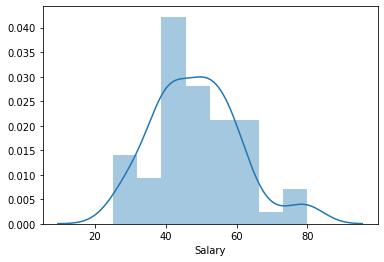

In [36]:
#2.4
sns.distplot(cmsu['Salary'])

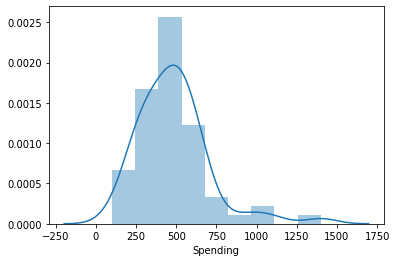

In [37]:
sns.distplot(cmsu['Spending'])

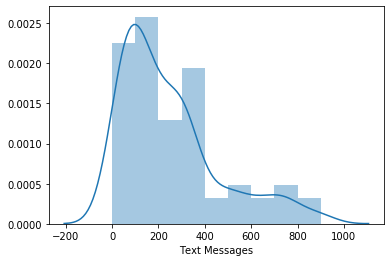

In [38]:
sns.distplot(cmsu['Text Messages'])

In [39]:
cmsu.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [57]:
cmsu['Salary'].mode()

0    40.0
dtype: float64

In [65]:
cmsu['Spending'].mode()

0    500
dtype: int64

In [64]:
cmsu['Text Messages'].mode()

0    300
dtype: int64

In [40]:
shin = pd.read_csv('A & B shingles-1.csv')

In [41]:
shin.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [42]:
#3.1
#A is alternate hypothesis as 0.316<0.35
#Ho:mu>=0.35
#Ha:mu<0.35

In [43]:
#3.2
t_statistic, p_value = ttest_1samp(shin['A'], 0.35)
print(t_statistic,p_value)

-1.4735046253382782 0.14955266289815025


In [44]:
print ("one-sample t-test p-value=", p_value)

one-sample t-test p-value= 0.14955266289815025


In [45]:
#p_value 0.149>0.05
#Ho is true

In [46]:
#3.3
#B is alternate hypothesis as 0.273<0.35
#Ho:mu>=0.35
#Ha:mu<0.35

In [47]:
shin['B'].dropna(inplace=True)

In [48]:
#3.4
t_statistic, p_value = ttest_1samp(shin['B'], 0.35)
print(t_statistic,p_value)

-3.1003313069986995 0.004180954800638363


In [49]:
#3.5
#Mean of A is 0.316
#Mean of B is 0.273
#muA!=muB, so it is alternate hypothesis

In [50]:
t_statistic, p_value = ttest_ind(shin['A'], shin['B'])
print(t_statistic, p_value)

1.289628271966112 0.2017496571835328


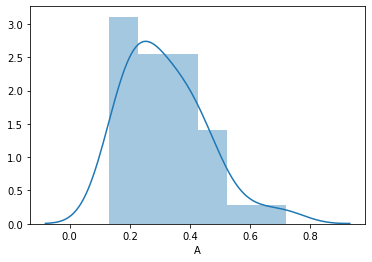

In [51]:
sns.distplot(shin['A'])

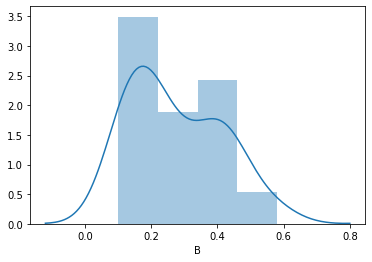

In [52]:
sns.distplot(shin['B'])

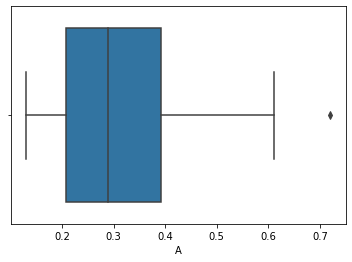

In [53]:
sns.boxplot(shin['A'])

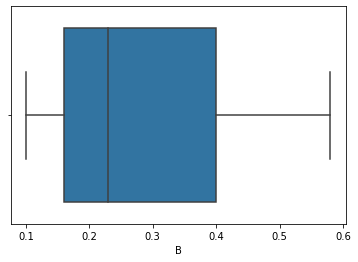

In [54]:
sns.boxplot(shin['B'])

In [55]:
#3.7_are above plots